In [2]:
import tensorflow as tf
tf.config.list_physical_devices()
from sklearn.metrics import classification_report

In [3]:
import tensorflow as tf   
tf.config.list_physical_devices()  
a = tf.random.normal(shape=[5], dtype=tf.float32)  
b = tf.nn.relu(a)         


with tf.device("/GPU:0"): 
  c = tf.nn.relu(a)        
with tf.device("/CPU:0"):
  c = tf.nn.relu(a)        

@tf.function  
def run():
  d = tf.random.uniform(shape=[100], dtype=tf.float32)
  e = tf.nn.relu(d)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [5]:
batch_size = 32
img_height = 180
img_width = 180

# Loading Dataset and Splitting it for training and validation

In [6]:
data_dir = ("D://medicinal//Medicinal plant dataset")

# Training Set
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Validation Set
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5945 files belonging to 40 classes.
Using 4756 files for training.
Found 5945 files belonging to 40 classes.
Using 1189 files for validation.


In [7]:
image_path = "D://medicinal//Medicinal plant dataset//Amla//29.jpg"
img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)

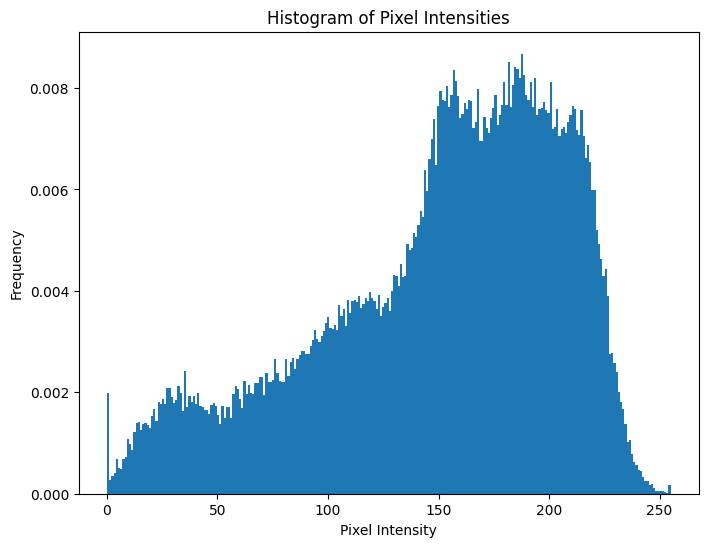

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'image_data' contains pixel values of an image
pixel_values = img_array.flatten()

plt.figure(figsize=(8, 6))
plt.hist(pixel_values, bins=256, range=(0, 255), density=True)
plt.title('Histogram of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

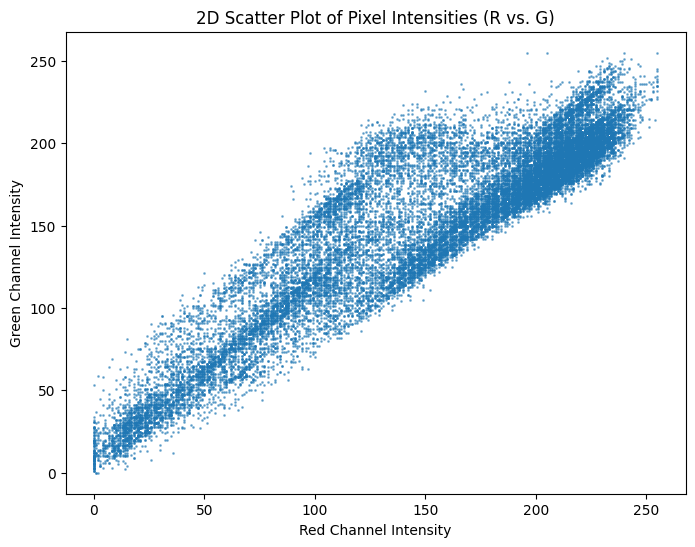

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(img_array[:, :, 0].flatten(), img_array[:, :, 1].flatten(), s=1, alpha=0.5)
plt.title('2D Scatter Plot of Pixel Intensities (R vs. G)')
plt.xlabel('Red Channel Intensity')
plt.ylabel('Green Channel Intensity')
plt.show()

In [10]:
class_names = train_ds.class_names
print(class_names)

['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']


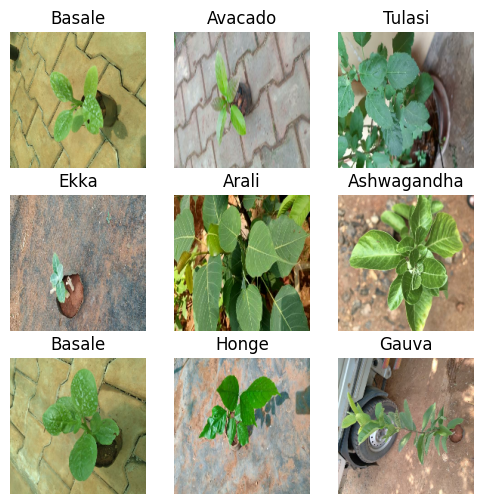

In [11]:

plt.figure(figsize=(6,6))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Configuring Dataset for performance

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Standardizig the data

In [14]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.97753215


# creating a sequential model

In [15]:
num_classes = len(class_names)

model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
   

In [16]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [18]:
epochs=12
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/12
149/149 [==============================] - 43s 280ms/step - loss: 3.1993 - accuracy: 0.1468 - val_loss: 2.6421 - val_accuracy: 0.2944
Epoch 2/12
149/149 [==============================] - 43s 286ms/step - loss: 2.2679 - accuracy: 0.3711 - val_loss: 2.0267 - val_accuracy: 0.4432
Epoch 3/12
149/149 [==============================] - 42s 283ms/step - loss: 1.5738 - accuracy: 0.5406 - val_loss: 1.8335 - val_accuracy: 0.4693
Epoch 4/12
149/149 [==============================] - 77s 516ms/step - loss: 0.9933 - accuracy: 0.7065 - val_loss: 1.5314 - val_accuracy: 0.5652
Epoch 5/12
149/149 [==============================] - 99s 663ms/step - loss: 0.5914 - accuracy: 0.8230 - val_loss: 1.2870 - val_accuracy: 0.6535
Epoch 6/12
149/149 [==============================] - 104s 697ms/step - loss: 0.3215 - accuracy: 0.9024 - val_loss: 1.2886 - val_accuracy: 0.6745
Epoch 7/12
149/149 [==============================] - 101s 681ms/step - loss: 0.1947 - accuracy: 0.9430 - val_loss: 1.3599 - val_

# plotting the training result


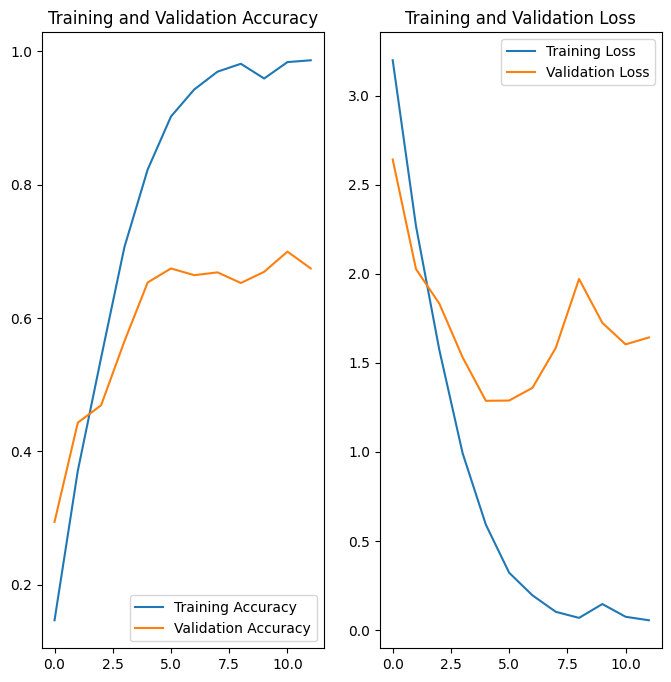

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data augmentation

In [20]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

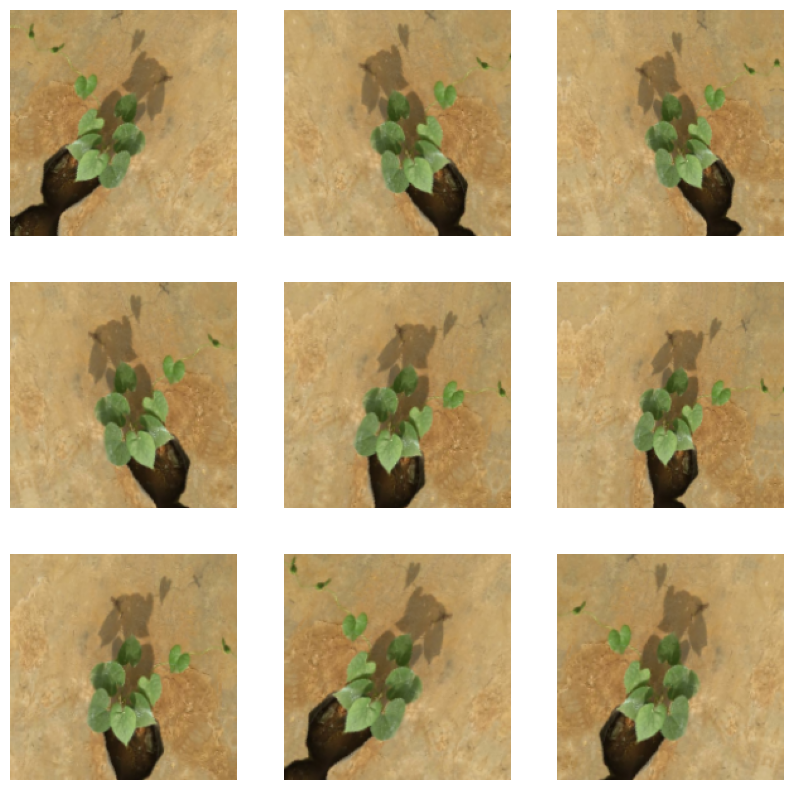

In [21]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Model Building After Data Augmentation and Dropout to reduce Over fitting

In [22]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint 
checkpoint_callback = ModelCheckpoint(
    'best_plant_model.h5',  # File to save the best model weights
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode='max',
)


In [26]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint_callback]
)

Epoch 1/5
149/149 [==============================] - 124s 817ms/step - loss: 3.4747 - accuracy: 0.0759 - val_loss: 3.1124 - val_accuracy: 0.1421
Epoch 2/5


c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


149/149 [==============================] - 133s 891ms/step - loss: 2.7464 - accuracy: 0.2290 - val_loss: 2.4854 - val_accuracy: 0.2868
Epoch 3/5
149/149 [==============================] - 133s 891ms/step - loss: 2.3280 - accuracy: 0.3230 - val_loss: 2.2884 - val_accuracy: 0.3179
Epoch 4/5
149/149 [==============================] - ETA: 0s - loss: 1.9514 - accuracy: 0.4212

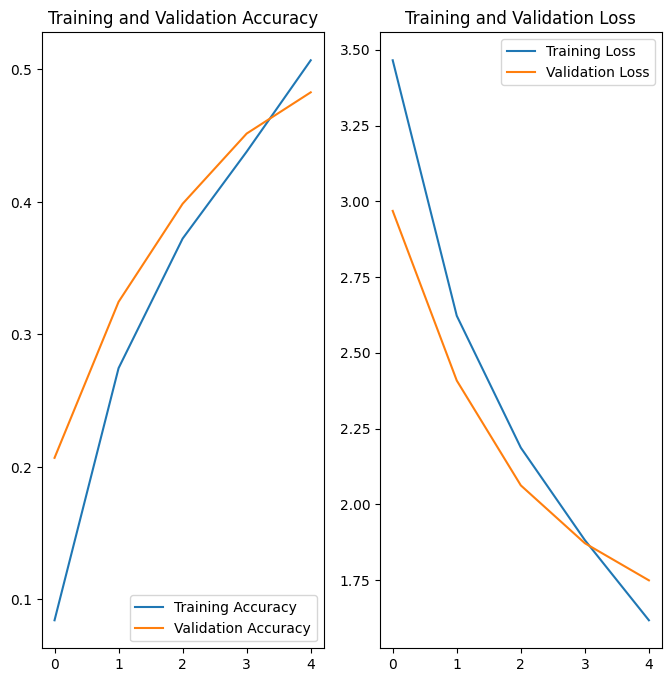

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction on New Data

In [27]:
class_names

['Aloevera',
 'Amla',
 'Amruta_Balli',
 'Arali',
 'Ashoka',
 'Ashwagandha',
 'Avacado',
 'Bamboo',
 'Basale',
 'Betel',
 'Betel_Nut',
 'Brahmi',
 'Castor',
 'Curry_Leaf',
 'Doddapatre',
 'Ekka',
 'Ganike',
 'Gauva',
 'Geranium',
 'Henna',
 'Hibiscus',
 'Honge',
 'Insulin',
 'Jasmine',
 'Lemon',
 'Lemon_grass',
 'Mango',
 'Mint',
 'Nagadali',
 'Neem',
 'Nithyapushpa',
 'Nooni',
 'Pappaya',
 'Pepper',
 'Pomegranate',
 'Raktachandini',
 'Rose',
 'Sapota',
 'Tulasi',
 'Wood_sorel']

In [28]:
plant_properties=[{"Name": "Aloevera", "Scientific Name": "Aloe vera",
  "Health Properties": ["Anti-inflammatory", "Antioxidant", "Wound healing"],
  "Proper Diseases": ["Skin burns", "Wounds", "Constipation", "Diabetes",
                      "Digestive disorders", "Psoriasis", "Acne"]},
 {"Name": "Amla", "Scientific Name": "Phyllanthus emblica",
  "Health Properties": ["Antioxidant", "Immune-boosting",
                        "Digestive aid"],
  "Proper Diseases": ["Antioxidant",
                      "Digestive disorders", "Hair health", "Diabetes", "Heart health", "Liver detoxification", "Anemia"]}, {"Name": "Amruta_Balli", "Scientific Name": "Tinospora cordifolia", "Health Properties": ["Immunomodulatory", "Antipyretic", "Anti-diabetic"], "Proper Diseases": ["Immune system disorders", "Fever", "Diabetes", "Respiratory disorders", "Skin disorders", "Arthritis", "Malaria"]}, {"Name": "Arali", "Scientific Name": "Ficus racemosa", "Health Properties": ["Anti-inflammatory", "Antioxidant", "Anti-diabetic"], "Proper Diseases": ["Respiratory disorders", "Diabetes", "Skin conditions", "Fever", "Hemorrhoids", "Ulcers"]}, {"Name": "Ashoka", "Scientific Name": "Saraca asoca", "Health Properties": ["Uterine health", "Antimicrobial", "Anti-inflammatory"], "Proper Diseases": ["Menstrual disorders", "Uterine health", "Diabetes", "Skin conditions", "Bleeding disorders", "Anemia"]}, {"Name": "Ashwagandha", "Scientific Name": "Withania somnifera", "Health Properties": ["Adaptogen", "Anti-stress", "Immune support"], "Proper Diseases": ["Stress", "Anxiety", "Immune system support", "Insomnia", "Arthritis", "Thyroid disorders"]}, {"Name": "Avocado", "Scientific Name": "Persea americana", "Health Properties": ["Heart-healthy fats", "Skin nourishing", "Anti-inflammatory"], "Proper Diseases": ["Skin health", "Heart health", "Arthritis", "Digestive disorders", "Cholesterol management"]}, {"Name": "Bamboo", "Scientific Name": "Bambusoideae", "Health Properties": ["Antioxidant", "Anti-inflammatory", "Digestive aid"], "Proper Diseases": ["Fever", "Respiratory disorders", "Digestive disorders", "Urinary disorders", "Bone health", "Dental health"]}, {"Name": "Basale", "Scientific Name": "Basella alba", "Health Properties": ["Nutrient-rich", "Antioxidant", "Anti-inflammatory"], "Proper Diseases": ["Iron deficiency", "Digestive health", "Respiratory ailments", "Eye health", "Bone health"]}, {"Name": "Betel", "Scientific Name": "Piper betle", "Health Properties": ["Antibacterial", "Digestive aid", "Oral health"], "Proper Diseases": ["Oral health", "Digestion", "Respiratory ailments", "Diabetes", "Joint pain"]}, {"Name": "Betel_Nut", "Scientific Name": "Areca catechu", "Health Properties": ["Stimulant", "Digestive aid", "Antiparasitic"], "Proper Diseases": ["Digestive disorders", "Parasite infections", "Respiratory ailments", "Mouth ulcers", "Intestinal worms"]}, {"Name": "Brahmi", "Scientific Name": "Bacopa monnieri", "Health Properties": ["Memory enhancer", "Antioxidant", "Anxiolytic"], "Proper Diseases": ["Memory enhancement", "Anxiety", "Depression", "Epilepsy", "ADHD"]}, {"Name": "Castor", "Scientific Name": "Ricinus communis", "Health Properties": ["Laxative", "Anti-inflammatory", "Skin conditioning"], "Proper Diseases": ["Constipation", "Skin ailments", "Rheumatism", "Menstrual disorders", "Arthritis", "Liver detoxification"]}, {"Name": "Curry_Leaf", "Scientific Name": "Murraya koenigii", "Health Properties": ["Antioxidant", "Anti-inflammatory", "Digestive aid"], "Proper Diseases": ["Digestive disorders", "Diabetes", "Hair health", "Eye health", "Cholesterol management"]}, {"Name": "Doddapatre", "Scientific Name": "Plectranthus amboinicus", "Health Properties": ["Anti-inflammatory", "Antibacterial", "Respiratory aid"], "Proper Diseases": ["Cough", "Cold", "Respiratory ailments", "Digestive disorders", "Wounds", "Dental health"]}, {"Name": "Ekka", "Scientific Name": "Calotropis procera", "Health Properties": ["Anti-inflammatory", "Antimicrobial", "Pain reliever"], "Proper Diseases": ["Skin conditions", "Asthma", "Wounds", "Rheumatism", "Digestive disorders", "Malaria"]}, {"Name": "Ganike", "Scientific Name": "Passiflora foetida", "Health Properties": ["Sedative", "Anxiolytic", "Antispasmodic"], "Proper Diseases": ["Anxiety", "Insomnia", "Digestive disorders", "Respiratory ailments", "Menstrual disorders"]}, {"Name": "Gauva", "Scientific Name": "Psidium guajava", "Health Properties": ["Antioxidant", "Antimicrobial", "Digestive aid"], "Proper Diseases": ["Diarrhea", "Dysentery", "Diabetes", "Skin conditions", "Gum health"]}, {"Name": "Geranium", "Scientific Name": "Pelargonium graveolens", "Health Properties": ["Antibacterial", "Antifungal", "Anti-inflammatory"], "Proper Diseases": ["Skin infections", "Stress relief", "Depression", "Menstrual disorders", "Respiratory ailments"]}, {"Name": "Henna", "Scientific Name": "Lawsonia inermis", "Health Properties": ["Natural dye", "Hair conditioner", "Antimicrobial"], "Proper Diseases": ["Hair health", "Skin conditions", "Wounds", "Headaches", "Fungal infections"]}, {"Name": "Hibiscus", "Scientific Name": "Hibiscus rosa-sinensis", "Health Properties": ["Antioxidant", "Blood pressure lowering", "Hair health"], "Proper Diseases": ["Hair health", "Blood pressure", "Digestive disorders", "Menstrual disorders", "Liver detoxification"]}, {"Name": "Honge", "Scientific Name": "Pongamia pinnata", "Health Properties": ["Antimicrobial", "Anti-inflammatory", "Pain reliever"], "Proper Diseases": ["Skin disorders", "Diabetes", "Rheumatism", "Wounds", "Respiratory ailments"]}, {"Name": "Insulin", "Scientific Name": "Syzygium cumini", "Health Properties": ["Hypoglycemic", "Antioxidant", "Digestive aid"], "Proper Diseases": ["Diabetes", "Digestive health", "Respiratory ailments", "Heart health", "Cholesterol management"]}, {"Name": "Jasmine", "Scientific Name": "Jasminum officinale", "Health Properties": ["Anxiolytic", "Antidepressant", "Antispasmodic"], "Proper Diseases": ["Anxiety", "Depression", "Skin conditions", "Respiratory ailments", "Menstrual disorders"]}, {"Name": "Lemon", "Scientific Name": "Citrus limon", "Health Properties": ["Antioxidant", "Digestive aid", "Immune-boosting"], "Proper Diseases": ["Digestive disorders", "Scurvy", "Weight loss", "Skin health", "Respiratory ailments"]}, {"Name": "Lemon_grass", "Scientific Name": "Cymbopogon citratus", "Health Properties": ["Antimicrobial", "Digestive aid", "Stress relief"], "Proper Diseases": ["Digestive disorders", "Stress relief", "Fever", "Colds", "Muscle pain", "Joint pain"]}, {"Name": "Mango", "Scientific Name": "Mangifera indica", "Health Properties": ["Antioxidant", "Digestive aid", "Immune-boosting"], "Proper Diseases": ["Diabetes", "Digestive health", "Skin health", "Heart health", "Eye health"]}, {"Name": "Mint", "Scientific Name": "Mentha spp.", "Health Properties": ["Digestive aid", "Antimicrobial", "Mentally stimulating"], "Proper Diseases": ["Digestive disorders", "Respiratory ailments", "Headaches", "Stress relief", "Nausea", "Menstrual disorders"]}, {"Name": "Nagadali", "Scientific Name": "Mesua ferrea", "Health Properties": ["Antioxidant", "Anti-inflammatory", "Digestive aid"], "Proper Diseases": ["Menstrual disorders", "Skin conditions", "Digestive disorders", "Respiratory ailments", "Joint pain", "Wounds"]}, {"Name": "Neem", "Scientific Name": "Azadirachta indica", "Health Properties": ["Antimicrobial", "Anti-inflammatory", "Antipyretic"], "Proper Diseases": ["Skin conditions", "Insect repellent", "Fever", "Digestive disorders", "Malaria", "Parasitic infections"]}, {"Name": "Nithyapushpa", "Scientific Name": "Vinca rosea", "Health Properties": ["Anticancer", "Antioxidant", "Antihypertensive"], "Proper Diseases": ["Diabetes", "Cancer (traditional uses)", "Hypertension", "Digestive disorders", "Mental health disorders"]}, {"Name": "Nooni", "Scientific Name": "Vitex negundo", "Health Properties": ["Antipyretic", "Analgesic", "Anti-inflammatory"], "Proper Diseases": ["Respiratory ailments", "Fever", "Digestive disorders", "Arthritis", "Malaria", "Headaches"]}, {"Name": "Pappaya", "Scientific Name": "Carica papaya", "Health Properties": ["Digestive aid", "Antioxidant", "Immune-boosting"], "Proper Diseases": ["Digestive disorders", "Skin conditions", "Parasitic infections", "Cancer", "Liver detoxification"]}, {"Name": "Pepper", "Scientific Name": "Piper nigrum", "Health Properties": ["Digestive aid", "Antioxidant", "Anti-inflammatory"], "Proper Diseases": ["Digestive disorders", "Respiratory health", "Arthritis", "Weight loss", "Cholesterol management"]}, {"Name": "Pomegranate", "Scientific Name": "Punica granatum", "Health Properties": ["Antioxidant", "Heart-protective", "Anticancer"], "Proper Diseases": ["Heart health", "Antioxidant", "Digestive disorders", "Cancer", "Liver detoxification"]}, {"Name": "Raktachandini", "Scientific Name": "Eclipta prostrata", "Health Properties": ["Hair health", "Liver tonic", "Antioxidant"], "Proper Diseases": ["Hair health", "Liver disorders", "Skin conditions", "Respiratory ailments", "Digestive disorders", "Jaundice"]}, {"Name": "Rose", "Scientific Name": "Rosa spp.", "Health Properties": ["Antioxidant", "Astringent", "Antidepressant"], "Proper Diseases": ["Skin health", "Anxiety", "Digestive disorders", "Heart health", "Menstrual disorders"]}, {"Name": "Sapota", "Scientific Name": "Manilkara zapota", "Health Properties": ["Digestive aid", "Antioxidant", "Anti-inflammatory"], "Proper Diseases": ["Digestive disorders", "Cough", "Respiratory ailments", "Skin conditions", "Diabetes"]}, {"Name": "Tulasi", "Scientific Name": "Ocimum tenuiflorum", "Health Properties": ["Antimicrobial", "Adaptogen", "Respiratory aid"], "Proper Diseases": ["Respiratory ailments", "Stress relief", "Digestive disorders", "Headaches", "Fever", "Malaria"]}, {"Name": "Wood_sorel", "Scientific Name": "Oxalis spp.", "Health Properties": ["Antioxidant", "Anti-inflammatory", "Digestive aid"],
"Proper Diseases": ["Digestive disorders","Fever", "Skin conditions", "Urinary tract infections", "Gout", "Joint pain"]}]

1/1 [==============================] - 0s 252ms/step
This image most likely belongs to Lemon with a 43.24% confidence.
{'Name': 'Lemon', 'Scientific Name': 'Citrus limon', 'Health Properties': ['Antioxidant', 'Digestive aid', 'Immune-boosting'], 'Proper Diseases': ['Digestive disorders', 'Scurvy', 'Weight loss', 'Skin health', 'Respiratory ailments']}


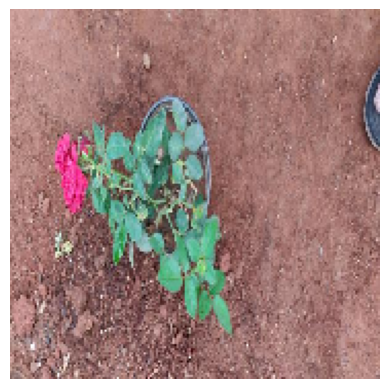

In [29]:
image_path ="D:\\medicinal\\Medicinal plant dataset\\Rose\\98.jpg"
img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print("This image most likely belongs to {} with a {:.2f}% confidence."
      .format(class_names[np.argmax(score)], 100 * np.max(score)))
plant_index=np.argmax(score)
print(plant_properties[plant_index])
plt.imshow(img)
plt.axis('off')
plt.show()

# Implementing the model

In [30]:
temp=plant_properties[plant_index]

In [31]:
temp

{'Name': 'Lemon',
 'Scientific Name': 'Citrus limon',
 'Health Properties': ['Antioxidant', 'Digestive aid', 'Immune-boosting'],
 'Proper Diseases': ['Digestive disorders',
  'Scurvy',
  'Weight loss',
  'Skin health',
  'Respiratory ailments']}

In [32]:
name=temp['Name']
sciname=temp['Scientific Name']
properties=temp['Health Properties']
disease=temp['Proper Diseases']

In [33]:
for i in properties:
    print(i)

Antioxidant
Digestive aid
Immune-boosting


# Features extraction 

In [37]:
import os
from tensorflow.keras.models import load_model
import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [36]:
!pip install tqdm

  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python37-32\python.exe -m pip install --upgrade pip' command.


In [ ]:
plant_classifier=load_model("best_plant_model.h5")

In [ ]:
images=[]
classes=[]

In [ ]:
validation_path="D://medicinal//Medicinal plant dataset"
for cls in tqdm.tqdm(os.listdir(validation_path)):
    cls_path=os.path.join(validation_path,cls)
    for im in os.listdir(cls_path):
        img_path=os.path.join(cls_path,im)
        img = tf.keras.utils.load_img(img_path, target_size=(180,180))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        images.append(img_array)
        classes.append(cls)

In [ ]:
plt.hist(classes)

In [ ]:
len(images)

In [ ]:
predicted_class=[]
for img in tqdm.tqdm(images):
    pc=plant_classifier.predict(img,verbose=False)
    score = tf.nn.softmax(pc[0])
    predicted_class.append(class_names[np.argmax(score)])

In [ ]:
plt.hist(predicted_class)

In [ ]:
import pandas as pd

In [ ]:
xyz=classification_report(classes,predicted_class)
print(xyz)

In [ ]:
xyz = {}

xyz['accuracy'] = {
    'precision': 'nan',
    'recall': 'nan',
    'f1-score': 0.8835787356312274,
    'support': 5945.0
}

In [ ]:
df_report = pd.DataFrame(xyz).transpose()

# Define the Excel file path
excel_file_path = 'classification_report2.xlsx'

# Write the DataFrame to Excel
df_report.to_excel(excel_file_path, index=True)

print(f"Classification report has been written to {excel_file_path}")